In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
im = cv2.imread("me_prof.png")

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
org_shp = im.shape
print(org_shp)

(900, 675, 3)


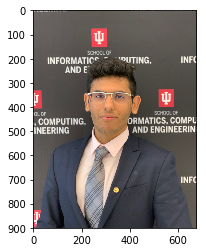

In [4]:
plt.imshow(im)
plt.show()

In [5]:
#Flatten each channel of the image 

In [6]:
all_pix = im.reshape((-1, 3))
print(all_pix.shape)

(607500, 3)


In [7]:
from sklearn.cluster import KMeans

In [31]:
d_colors = 6

km = KMeans(n_clusters=d_colors)

km.fit(all_pix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
#3 most dominant color RGB codes in float 
centers = km.cluster_centers_

In [33]:
centers = np.array(centers, dtype='uint8')

In [34]:
print(centers)

[[ 97  92  87]
 [164 158 155]
 [ 45  45  47]
 [205 122  90]
 [233 216 201]
 [ 72  71  74]]


In [35]:
#output all these color combinations (swatch)

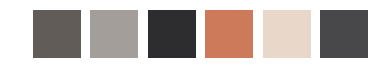

In [37]:
i = 1 

plt.figure(0, figsize=(6,2))

colors = []

for each_col in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i += 1 
    
    colors.append(each_col)
    #Color swatch
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [38]:
new_img = np.zeros((900*675,3), dtype='uint8')

In [39]:
print(new_img.shape)

(607500, 3)


In [40]:
km.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

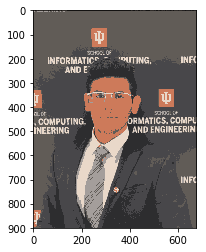

In [41]:
for kx in range(new_img.shape[0]):
    new_img[kx] = colors[km.labels_[kx]]
    
new_img = new_img.reshape((org_shp))
plt.imshow(im)
plt.imshow(new_img)
plt.show()